## import libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree

## load data and get info

In [2]:
iris=pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Preprocessing

In [8]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a sample dataframe with categorical data
Speciess = pd.DataFrame({'Species': ['Iris-setosa', 'Iris-versicolor','Iris-virginica']})

print(f"Before Encoding the Data:\n\n{Speciess}\n")

Before Encoding the Data:

           Species
0      Iris-setosa
1  Iris-versicolor
2   Iris-virginica



In [10]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the categorical data
iris['Species'] = le.fit_transform(iris['Species'])

In [11]:
Speciess

,Species
0,Iris-setosa
1,Iris-versicolor
2,Iris-virginica


In [12]:
iris.drop(['Id'],inplace=True,axis=1)

## Data Visualization

In [13]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'Sepal Length (Cm)')

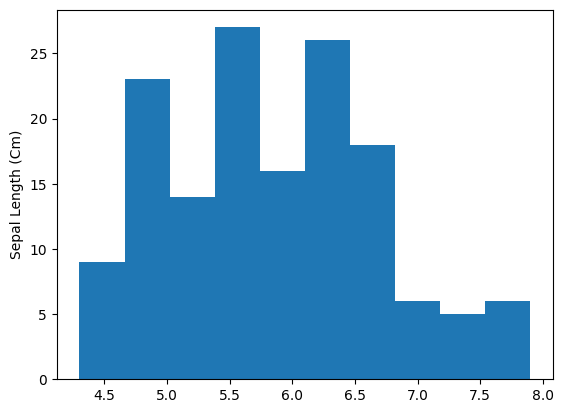

In [14]:
plt.hist(iris['SepalLengthCm'])
plt.ylabel('Sepal Length (Cm)')

Text(0, 0.5, 'Sepal Width(Cm)')

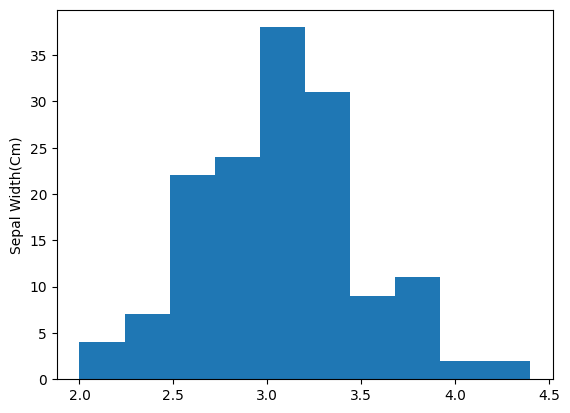

In [15]:
plt.hist(iris['SepalWidthCm'])
plt.ylabel('Sepal Width(Cm)')

Text(0, 0.5, 'Petal Length (Cm)')

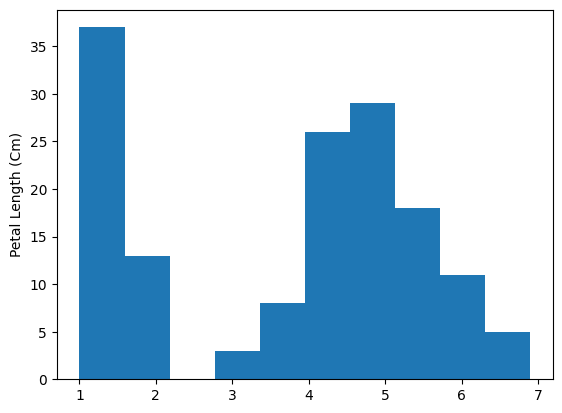

In [16]:
plt.hist(iris['PetalLengthCm'])
plt.ylabel('Petal Length (Cm)')

Text(0, 0.5, 'Petal Width (Cm)')

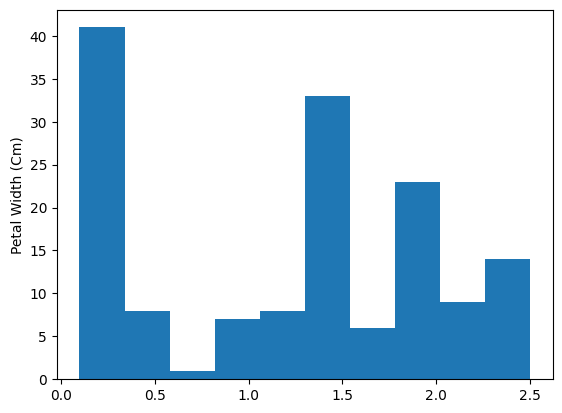

In [17]:
plt.hist(iris['PetalWidthCm'])
plt.ylabel('Petal Width (Cm)')

<Axes: xlabel='Species'>

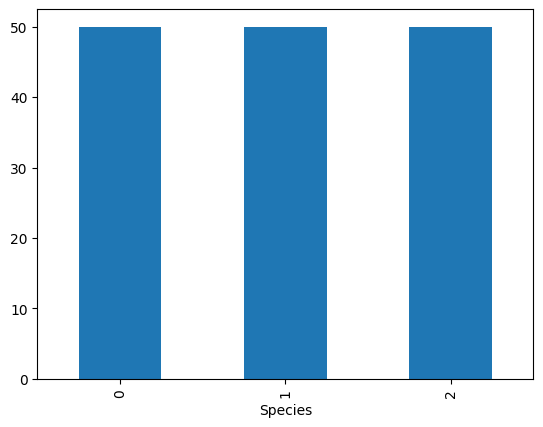

In [18]:
iris['Species'].value_counts().plot(kind='bar')

In [19]:
iris['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

<Axes: >

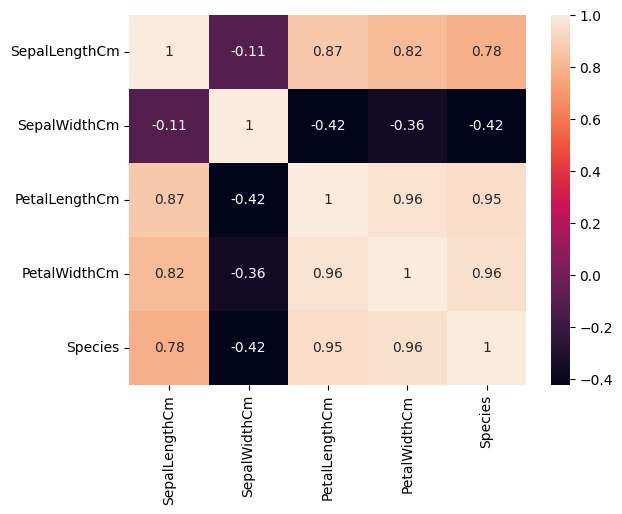

In [20]:
sns.heatmap(iris.corr(),annot=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

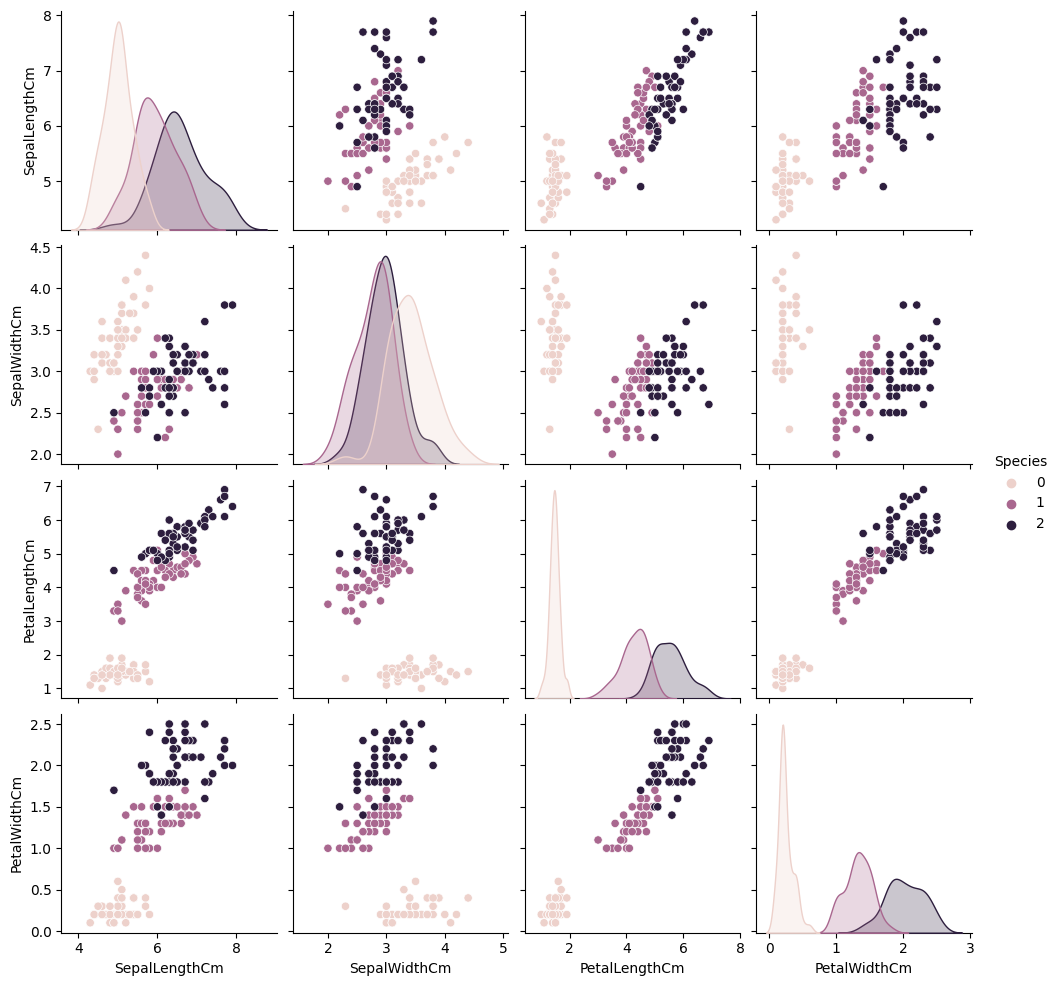

In [21]:
sns.pairplot(data=iris,hue="Species")

## Building Model

In [22]:
x=iris.drop('Species',axis=1)

In [23]:
y=iris['Species']

In [24]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [27]:
model=DecisionTreeClassifier()

In [28]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
model.score(x_train,y_train)

1.0

In [30]:
model.score(x_test,y_test)

0.9333333333333333

## Evaluation

In [31]:
predict_test=model.predict(x_test)

In [32]:
predict_test

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [33]:
confusion_matrix(y_test,predict_test)

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  9]])

In [34]:
classification_report(y_test,predict_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         9\n           1       0.83      1.00      0.91        10\n           2       1.00      0.82      0.90        11\n\n    accuracy                           0.93        30\n   macro avg       0.94      0.94      0.94        30\nweighted avg       0.94      0.93      0.93        30\n'

In [35]:
accuracy_score(y_test,predict_test)

0.9333333333333333

In [36]:
predict_train=model.predict(x_train)

In [37]:
predict_train

array([0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2,
       1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2,
       1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0,
       2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 1])

In [38]:
confusion_matrix(y_train,predict_train)

array([[41,  0,  0],
       [ 0, 40,  0],
       [ 0,  0, 39]])

In [39]:
classification_report(y_train,predict_train)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        41\n           1       1.00      1.00      1.00        40\n           2       1.00      1.00      1.00        39\n\n    accuracy                           1.00       120\n   macro avg       1.00      1.00      1.00       120\nweighted avg       1.00      1.00      1.00       120\n'

In [40]:
accuracy_score(y_train,predict_train)

1.0

[Text(0.3076923076923077, 0.9166666666666666, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]'),
 Text(0.23076923076923078, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.38461538461538464, 0.75, 'PetalWidthCm <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]'),
 Text(0.15384615384615385, 0.5833333333333334, 'PetalLengthCm <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.23076923076923078, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.5833333333333334, 'PetalWidthCm <= 1.75\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]'),
 Text(0.38461538461538464, 0.4166666666666667, 'SepalWidthCm <= 2.6\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.25, 'PetalLengthCm <= 5.45\ngini = 0.

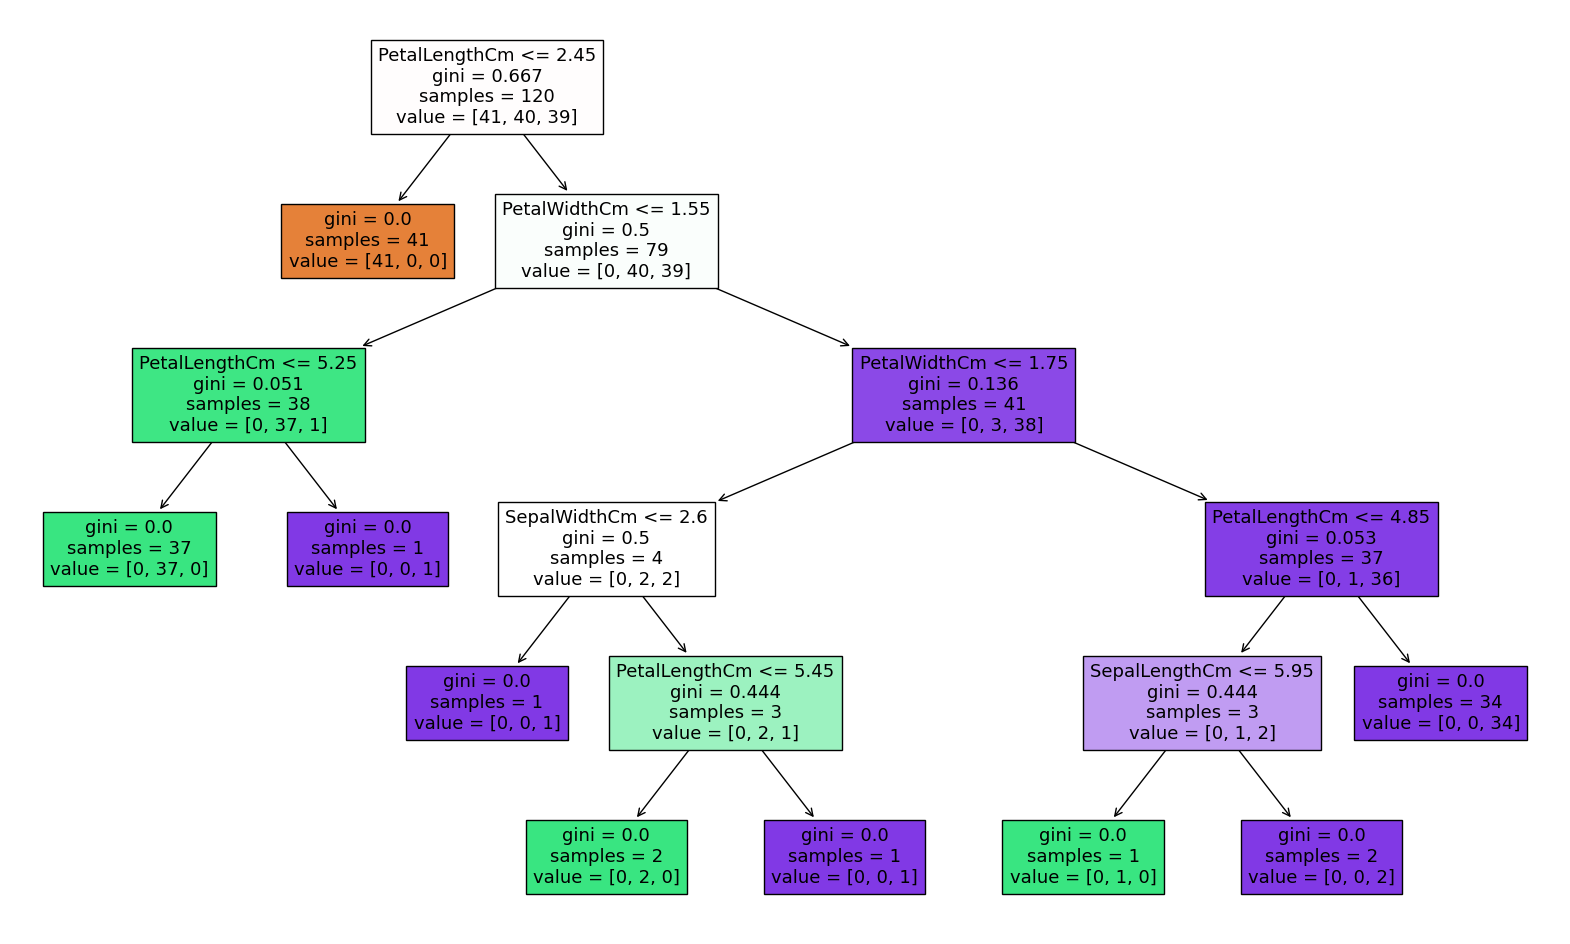

In [41]:
plt.figure(figsize=(20,12))
tree.plot_tree(model,filled=True,feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])